In [2]:
import atlite
import logging
import pickle 
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.constants import convert_temperature

from helper_functions import split_list, plot_feature_array

logging.basicConfig(level=logging.INFO)

Import cutout from file

In [3]:
cutout = atlite.Cutout('cutout-de-2011-2015.nc')

# Create Cutout

In [ ]:
cutout = atlite.Cutout(
    path="de-2011-2012.nc",
    module="era5",
    x=slice(5.8, 15.1),
    y=slice(47.2, 55.1),
    time=slice("2011", "2012"),
)

INFO:atlite.cutout:Building new cutout de-2011-2015.nc


In [4]:
cutout.prepare()

INFO:atlite.data:Cutout already prepared.


<Cutout "cutout-de-2011-2015">
 x = 6.00 ⟷ 15.00, dx = 0.25
 y = 47.25 ⟷ 55.00, dy = 0.25
 time = 2011-01-01 ⟷ 2015-12-31, dt = h
 module = era5
 prepared_features = ['height', 'wind', 'influx', 'temperature', 'runoff']

# Information

In [17]:
cutout.data['runoff']

<xarray.DataArray 'runoff' (time: 43824, y: 32, x: 37)> Size: 415MB
dask.array<xarray-runoff, shape=(43824, 32, 37), dtype=float64, chunksize=(100, 32, 37), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) float64 296B 6.0 6.25 6.5 6.75 7.0 ... 14.25 14.5 14.75 15.0
  * y        (y) float64 256B 47.25 47.5 47.75 48.0 ... 54.25 54.5 54.75 55.0
  * time     (time) datetime64[ns] 351kB 2011-01-01 ... 2015-12-31T23:00:00
    lon      (x) float64 296B dask.array<chunksize=(37,), meta=np.ndarray>
    lat      (y) float64 256B dask.array<chunksize=(32,), meta=np.ndarray>
Attributes:
    units:      m
    long_name:  Runoff
    module:     era5
    feature:    runoff

In [4]:
list(cutout.data.keys())

['height',
 'wnd100m',
 'wnd_azimuth',
 'roughness',
 'influx_toa',
 'influx_direct',
 'influx_diffuse',
 'albedo',
 'solar_altitude',
 'solar_azimuth',
 'temperature',
 'soil temperature',
 'runoff']

# 2011-2015

In [5]:
cutout.data['time']

<xarray.DataArray 'time' (time: 43824)> Size: 351kB
array(['2011-01-01T00:00:00.000000000', '2011-01-01T01:00:00.000000000',
       '2011-01-01T02:00:00.000000000', ..., '2015-12-31T21:00:00.000000000',
       '2015-12-31T22:00:00.000000000', '2015-12-31T23:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 351kB 2011-01-01 ... 2015-12-31T23:00:00

In [3]:
snapshot_split = split_list(cutout.data['time'].data, 30)

In [11]:
feature_keys = list(cutout.data.keys())[1:]
features = dict()
for key in feature_keys:
    features[key] = []

for snapshots in snapshot_split:
    time_slice = slice(snapshots[0], snapshots[-1])
    for key in feature_keys:
        mean = float(np.mean(cutout.data[key].sel(time=time_slice).data))
        features[key].append(mean)

In [13]:
with open('weather_features.pkl', 'wb') as f:
    pickle.dump(features, f)

In [14]:
dates = [snapshots[int(len(snapshots)/2)] for snapshots in snapshot_split]

[0.8743557813846792, 8.166271103125553, 15.023747100275955, 16.97364336704794, 12.376186385728829, 4.391305924817857, 0.006549693118245159, 7.431385926990913, 14.616097246822392, 17.858233647565612, 11.436416024265156, 3.4502381718734227, -0.06391426080818974, 4.158739264919518, 13.5842416244746, 18.717188475283137, 12.136709031806674, 4.259631572735202, 3.1404291797280166, 8.764392879005698, 14.224184053960471, 17.69473248076099, 13.494268824806568, 4.850999271011915, 1.7278195149835938, 6.7816376595461065, 14.218136220194879, 19.42465223101624, 10.916922163183926, 6.977460130736631]


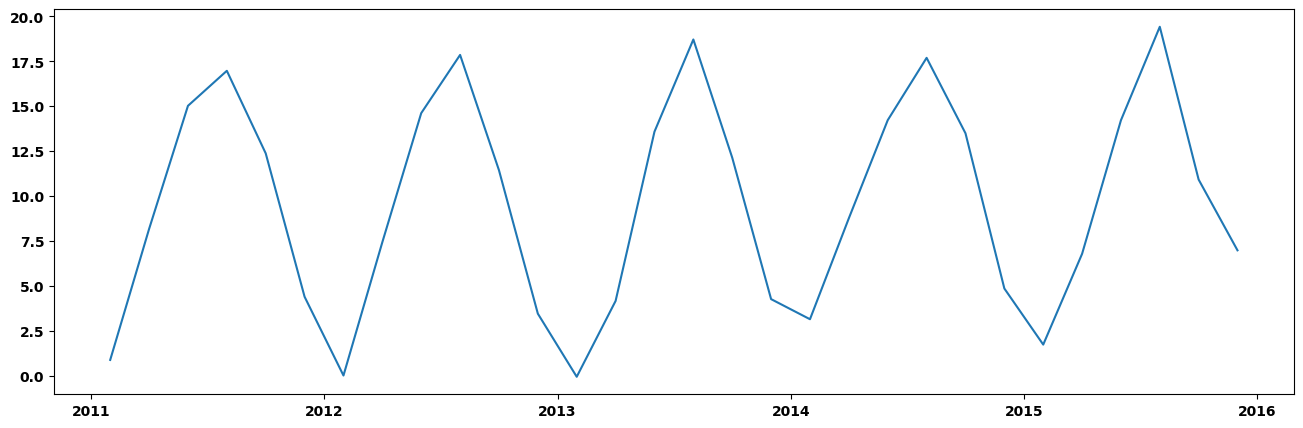

In [12]:
temperatures_C = [convert_temperature(tempr, 'K', 'C') for tempr in features['temperature']]
print(temperatures_C)
plt.figure(figsize=(16,5))
plt.plot(dates, temperatures_C)

# 2011

In [10]:
time_2011 = cutout.data['time'].sel(time=slice(np.datetime64('2011-01-01'), np.datetime64('2011-12-31'))).data
snapshot_split_2011 = split_list(time_2011, 52)

In [11]:
time_2012 = cutout.data['time'].sel(time=slice(np.datetime64('2012-01-01'), np.datetime64('2012-12-31'))).data
snapshot_split_2012 = split_list(time_2012, 52)

In [16]:
time_2013 = cutout.data['time'].sel(time=slice(np.datetime64('2013-01-01'), np.datetime64('2013-12-31'))).data
snapshot_split_2013 = split_list(time_2013, 52)

In [24]:
time_2015 = cutout.data['time'].sel(time=slice(np.datetime64('2015-01-01'), np.datetime64('2015-12-31'))).data
snapshot_split_2015 = split_list(time_2015, 52)

In [25]:
feature_keys = list(cutout.data.keys())[1:]
features_2015 = dict()
for key in feature_keys:
    features_2015[key] = []

for snapshots in snapshot_split_2015:
    time_slice = slice(snapshots[0], snapshots[-1])
    for key in feature_keys:
        mean = float(np.mean(cutout.data[key].sel(time=time_slice).data))
        features_2015[key].append(mean)

In [26]:
with open('weather_features_2015.pkl', 'wb') as f:
    pickle.dump(features_2015, f)

[1.8697424999070904, 5.634877058639063, 1.6467960735243992, 0.6742413580359425, -0.47629641643936793, 0.09829845702495277, 0.8212573305080468, 2.421804561562567, 3.260911655905261, 5.0189700699686455, 5.088937140820406, 4.972525939777256, 5.949641563678995, 4.168077900383366, 10.64081644018745, 9.038677464635953, 9.91265504659782, 11.771742751584725, 13.41235773506537, 11.303224769549558, 11.363235070015946, 14.11723096157175, 16.37846402155492, 16.11940093214838, 12.664523472193537, 18.21347341720127, 22.758675708413477, 17.10327553464134, 21.09560390217257, 16.982195266637746, 18.16444306332039, 22.353680547832198, 18.694718905095158, 17.744040952023624, 19.325921687908476, 12.759406350528423, 14.781424419118707, 13.061957858290896, 11.172737619799591, 12.056134618936085, 7.39224507379754, 7.02423469985456, 8.852988064086901, 7.45760452988543, 12.24403969153309, 9.96367102591364, 3.691127931514643, 5.020282941025471, 6.299547933168753, 4.422930423463299, 8.740215593727726, 6.28562995

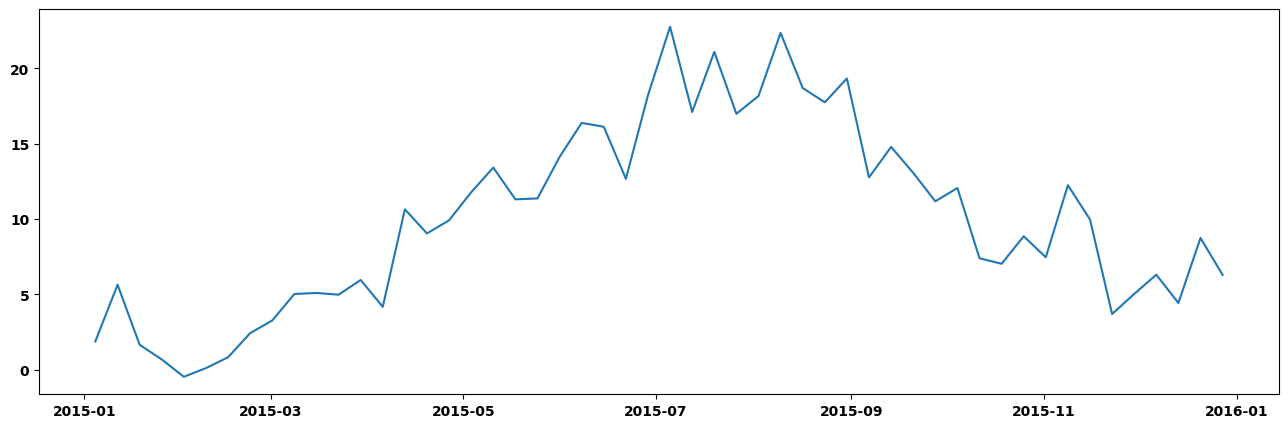

In [27]:
dates = [snapshots[int(len(snapshots)/2)] for snapshots in snapshot_split_2015]

temperatures_C = [convert_temperature(tempr, 'K', 'C') for tempr in features_2015['temperature']]
print(temperatures_C)
plt.figure(figsize=(16,5))
plt.plot(dates, temperatures_C)

# 2011-2015 1week

In [21]:
snapshot_split_1w = split_list(cutout.data['time'].data, 260)

In [4]:
feature_keys = list(cutout.data.keys())[1:]
features_1w = dict()
for key in feature_keys:
    features_1w[key] = []

for snapshots in snapshot_split_1w:
    time_slice = slice(snapshots[0], snapshots[-1])
    for key in feature_keys:
        mean = float(np.mean(cutout.data[key].sel(time=time_slice).data))
        features_1w[key].append(mean)

In [5]:
with open('weather_features_1w.pkl', 'wb') as f:
    pickle.dump(features_1w, f)

In [19]:
with open('weather_features_1w.pkl', 'rb') as f:
    features_1w = pickle.load(f)

[-0.838656151320265, 4.384302276413507, 2.912607875212416, -0.860109143715647, -1.6310671108684573, 4.679996759393703, 0.9541784770693198, -3.0316559980401507, 0.9045916038490986, 3.118756565958563, 6.453316177010549, 5.948503463083682, 7.78176216715849, 11.273057917748076, 8.14841973715528, 12.586934689744623, 12.532809882881338, 9.537399839050067, 14.830885486050875, 13.559538688647365, 14.75332091287845, 16.419329707106442, 16.355585524221624, 16.236324214345245, 14.797702943735715, 17.075779439425787, 17.501229300515092, 17.453316067682863, 15.278375561861196, 15.367242307000254, 18.414235531162603, 15.798743701219792, 18.15176743841664, 19.897287378517774, 15.512769983681892, 16.46799761666591, 15.331134659396014, 12.802078454274579, 15.725404156114394, 12.599990624119926, 9.20356802807271, 6.29018675593943, 8.919709597624262, 9.263477640534234, 5.19041680445406, 2.6347310268450315, 3.782837801942435, 5.398041897112137, 3.36860737214505, 3.604395552881101, 3.1328104742744927, 4.86

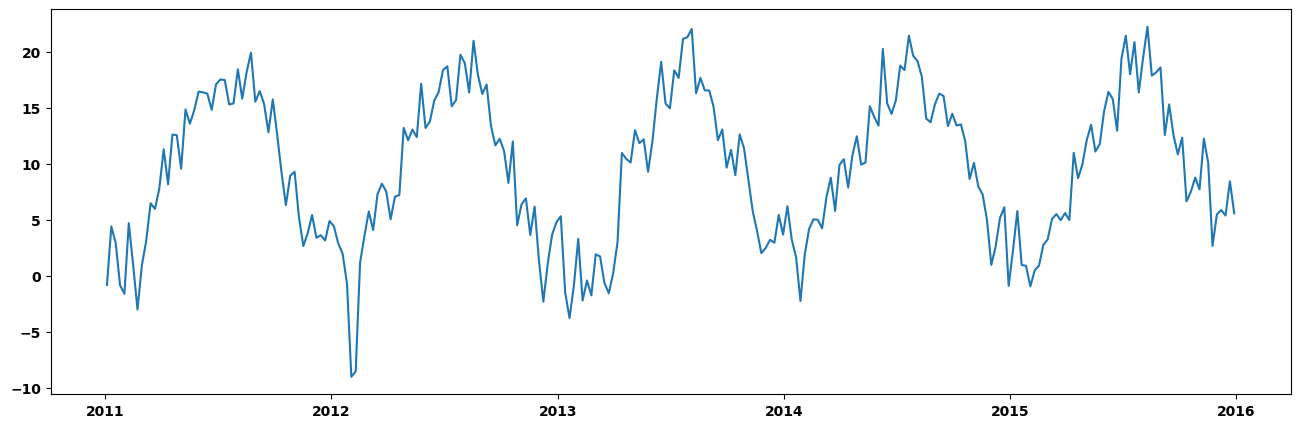

In [22]:
dates = [snapshots[int(len(snapshots)/2)] for snapshots in snapshot_split_1w]

temperatures_C = [convert_temperature(tempr, 'K', 'C') for tempr in features_1w['temperature']]
print(temperatures_C)
plt.figure(figsize=(16,5))
plt.plot(dates, temperatures_C)

# location

In [7]:
snapshot_split = split_list(cutout.data['time'].data, 260)
location_split_x = 10
location_split_y = 51

feature_keys_x = [('west', slice(cutout.data['x'].data[0], location_split_x)), ('east', slice(location_split_x, cutout.data['x'].data[-1]))]
feature_keys_y = [('north', slice(location_split_y, cutout.data['y'].data[-1])), ('south', slice(cutout.data['y'].data[0], location_split_y))]

features = dict()
for key_y,_ in feature_keys_y:
    for key_x,_ in feature_keys_x:
        features[key_y+key_x] = []

for snapshots in snapshot_split:
    time_slice = slice(snapshots[0], snapshots[-1])
    for key_y, slice_y in feature_keys_y:
        for key_x, slice_x in feature_keys_x:
            sample = cutout.data['wnd100m']
            sample = sample.sel(time=time_slice)
            sample = sample.sel(x=slice_x)
            sample = sample.sel(y=slice_y)
            features[key_y+key_x].append(float(np.mean(sample.data)))

In [8]:
with open('weather_features_wind_1w.pkl', 'wb') as f:
    pickle.dump(features, f)